# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 4_Statistics & Probability

## 1. One Dimensional Statistics


**Contents of this note refer to 1) Dr. Joe Anderson's teaching materials; 2) textbook "Data Science from Scratch";**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

## One-Dimensional Statistical Tools

When we're presented with sets of raw data from some observations, we need to be able to systematically quantify its various properties. 
This is the purpose of most one-dimensional descriptive statistics:

## Central tendencies: mean/average, median, quantile

### mean/average
- Quantify the "average" value present (i.e. the mean), which is used to represent where the data is centered.

$$ \bar{x} := \frac{1}{N} \sum_{i=1}^{N} x_i $$



In [197]:
import numpy as np
import pandas as pd
import math
from collections import Counter

In [198]:
def mean(x):
    """calculate and return the mean of a numpy array (or a list)"""
    sum = 0
    for i in range(len(x)):
        sum += x[i]
    return sum/len(x)



In [199]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,
               12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,
               9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(mean(num_friends))
df = pd.DataFrame(num_friends)
df.mean()

7.333333333333333


0    7.333333
dtype: float64

### Median

The middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).

In [200]:
def median(x):
    """return the 'middle value' of the array x after sorting"""
    tmp = sorted(x)
    # use // for integer division (i.e. round down)
    return tmp[len(x) // 2] if len(x) % 2 == 1 else (tmp[len(x) // 2] + tmp[(len(x) // 2)-1]) / 2

In [201]:
print(median([1, 10, 2, 9, 5]))
df = pd.DataFrame([1, 10, 2, 9, 5])

df.median()

5


0    5.0
dtype: float64

### Quantile

A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies).

In [202]:
def quantile(xs, q):
    """generalize the median to the q-percent quantile -- q is a float in range (0,1)"""
    tmp = sorted(xs)
    return tmp[ int(len(tmp) * q) ]

In [203]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,
               12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,
               9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

print(quantile(num_friends, 0.25))
df = pd.DataFrame(num_friends)
df.quantile(0.25)

3


0    3.0
Name: 0.25, dtype: float64

In [204]:
def interquartile_range(xs):
    """return difference of the 25% quantile and 75% quantile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [205]:
interquartile_range(num_friends)

6

## Dispersion: range/spread, variance, standard deviation
Dispersion refers to measures of how spread out the data is.

### range/spread
A very simple measure is *range (or the "spread" of the data, how varied is it?)*, which is just the difference between the largest and smallest elements.

In [206]:
def spread(x):
    """one way to measure the spread of data"""
    return max(x) - min(x)

In [207]:
print(spread(num_friends))
df.max() - df.min()

99.0


0    99.0
dtype: float64

### Variance

variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. -- Wikipedia

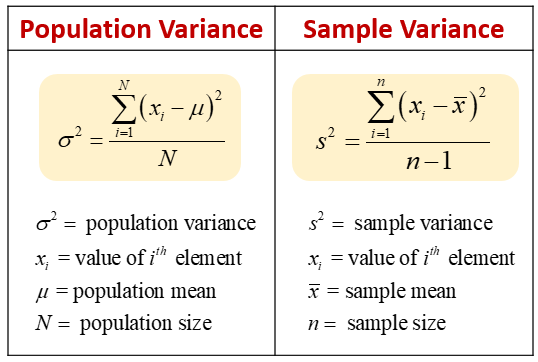

https://www.onlinemathlearning.com/variance.html

### Standard deviation

The standard deviation of a random variable, sample, statistical population, data set, or probability distribution is the square root of its variance. -- Wikipedia

$$ std(X) := \sqrt{\sigma^2_x} $$

In [208]:
def center(xs):
    return np.array([x - mean(xs) for x in xs])

def var(xs):
    """return variance of x -- the average squared distance from the mean"""
    return mean([x**2 for x in center(xs)])  # population variance
    #return sum([x**2 for x in center(xs)])/(len(xs) - 1)   # sample variance

def std(xs):
    return math.sqrt(var(xs))

In [209]:
print(var([4, 8, 6, 5, 3, 2, 8, 9, 2, 5]))
df = pd.DataFrame([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])
df.var(ddof=0)

5.76


0    5.76
dtype: float64

In [210]:
print(std([4, 8, 6, 5, 3, 2, 8, 9, 2, 5]))
df.std(ddof=0)

2.4


0    2.4
dtype: float64

## Correlation: covariance, correlation

### Covariance
Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

Covariance is the average product of differences with their means:
$$ cov(X,Y) = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y}) $$
Note then covariance generalizes variance in the sense that 
$$ var(X) = cov(X,X) $$

In [211]:
def cov(xs, ys):
    """Take two lists of observations and compute their covariance"""
    # https://www.geeksforgeeks.org/python-assert-keyword/
    assert len(xs) == len(ys)
    cx = center(xs)
    cy = center(ys)
    return mean([cx[i]*cy[i] for i in range(len(cx))])

In [212]:
A = [3, 6, 4]
B = [7, 12, -9]

first  = pd.Series(A)
second = pd.Series(B)
print(cov(A, B))
print(first.cov(second, ddof=0))




4.555555555555556
4.555555555555555


In [213]:
print(cov(A,A))

print(var(A))

print(cov(B, B))

1.5555555555555554
1.5555555555555554
80.22222222222221


### Correlation

Correlation between two sample populations/events/processes is measure of their relationship. Typically given by a 'correlation coefficient' that is in the range (-1,1). A positive correlation means that when the value of the first process/observation is higher, so will the other one be; i.e. they increase together. Negative implies an inverse relationship; when one grows, the other shrinks. 

Correlation is defined as the covariance devides out the standard deviation of both variables:

$$ \sigma_{x,y} := \frac{cov(X,Y)}{\sigma_x \sigma_y} $$

In [214]:
def correlation(xs, ys):
    """Calculate the (Pearson) correlation coefficient"""
    return cov(xs,ys)/(std(xs)*std(ys))

In [215]:
# https://www.datacamp.com/tutorial/tutorial-datails-on-correlation
experience = [1, 3, 4, 5, 5, 6, 7, 10, 11, 12, 15, 20, 25, 28, 30, 35]
salary = [20000, 30000, 40000, 45000, 55000, 60000, 80000, 100000, 130000, 
          150000, 200000, 230000, 250000, 300000, 350000, 400000]
print(correlation(experience, salary))

first = pd.Series(experience)
second = pd.Series(salary)

print(first.corr(second))

0.9929845761480396
0.9929845761480398


A correlation of zero indicates that there is no **linear** relationship between the two variables. However, there may be other sorts of relationships. For example:

In [216]:
# we put all the above statistics functions in a file & import it to program
# the file is in the same folder of this note
import stats

# Perfectly un-correlated data points but which are perfectly related; y = |x|
xs = [-2, -1, 0, 1, 2]
ys = [ 2,  1, 0, 1, 2]

print(stats.correlation(xs,ys))

first = pd.Series(xs)
second = pd.Series(ys)

print(stats.correlation(first, second))

a = np.array(xs)
b = np.array(ys)

print(np.correlate(a, b))

print(np.cov(A, B, ddof=0)[0][1])

0.0
0.0
[0]
4.555555555555555


It indicates that x and y have zero correlation. But they certainly have a relationship: y = abs(x)

Another example:

In [217]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

print(np.correlate(x, y))

stats.correlation(x,y)

[0.1]


0.9999999999999998

It looks x and y are perfectly correlated, but it is quite possible that this relationship is not all that interesting.

**Correlation tells you nothing about how large the relationship is.**

### Using Python modules

We want to, in Python, be able to import not only nice build-in libraries, but code we wrote ourselves!
Similar to, in `c++`, being able to `#include` other `.cpp` files.

Idea:
- Write your python tools, functions, etc. in some file that ends in `.py` (e.g. `stats.py`)
- If the file is local to your current other Python file or Notebook, you can simple `import` that file by name (without the `.py`), e.g. `import stats`
- This then loads the file into a scope named by the import, e.g. a function called `mean` defined in `stats.py` will be acessible via `stats.mean()`
- Note: if using a notebook or kernel-based environment, either have to unload and reload the module to refresh its contents or restart your kernel

In [218]:
# every variable, function, etc. in the top-level scope is now here(!) 
# and located under the "stats" scope.
# When you import, it essentially does `python stats.py` and stores 
# the definitions/variables
import numpy as np
import stats

# you can import and load into the global scope
# from stats import mean 
# only import the mean function but put it in the global scope
# from stats import * 
# to get everything in the global scope

In [219]:
# with `import stats`
print(stats.mean(np.array([3,5,7,9])))

# with `from stats import mean`
# mean(np.array([3,5,7,9]))
np.array([3, 5, 7, 9]).mean()

6.0


6.0

In [220]:
stats.median([2,5,4,3,1])

3

In [221]:
stats.median([2,5,4,3])

3.5

In [222]:
stats.var([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

5.76

# 1D statistics example: Iris dataset

https://archive.ics.uci.edu/ml/datasets/iris

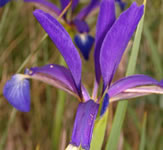

In [223]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import stats

In [224]:
iris = pd.read_csv('iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 
                          'petal_width', 'class'])

In [225]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [226]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [227]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Distinction between the species of iris

Strategies:

- Using length and width of only petals? 
    - Possibly combine to represent the area of the petal?
- How about sepal "size" ratio with petal "size"?

In [228]:
lengths = iris[['petal_length', 'class']]

In [229]:
lengths

,petal_length,class
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
...,...,...
145,5.2,Iris-virginica
146,5.0,Iris-virginica
147,5.2,Iris-virginica
148,5.4,Iris-virginica


In [230]:
iris.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [231]:
iris.groupby('class').std()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [232]:
iris.groupby('class').mean().transpose()

class,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.418,2.770,2.974
petal_length,1.464,4.260,5.552
petal_width,0.244,1.326,2.026


Text(0, 0.5, 'centimeters')

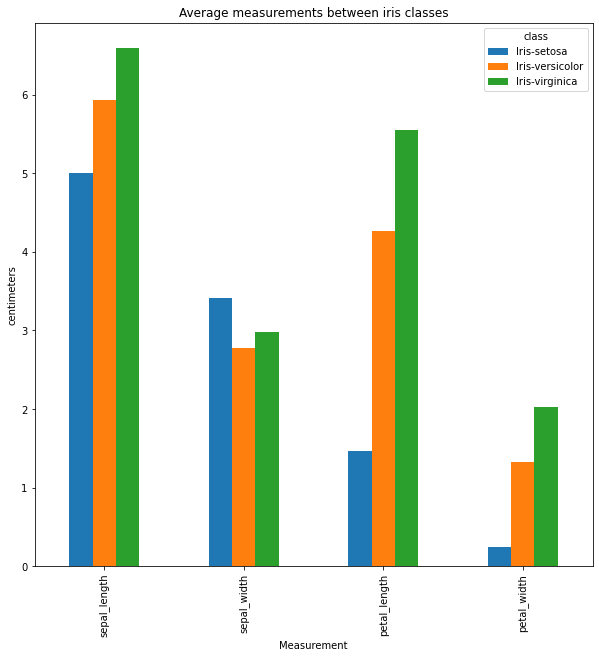

In [233]:
iris.groupby('class').mean().transpose().plot.bar(figsize=(10,10))
plt.title('Average measurements between iris classes')
plt.xlabel('Measurement')
plt.ylabel('centimeters') # important to realize the units are all the same!

In [234]:
# going with "size" meaning rectangular area...

iris['sepal_rectangular_area'] = iris['sepal_length'].values * iris['sepal_width'].values
iris['petal_rectangular_area'] = iris['petal_length'].values * iris['petal_width'].values

In [235]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_rectangular_area,petal_rectangular_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,Iris-virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42


In [236]:
iris['sepal_petal_area_ratio'] = \
    iris['sepal_rectangular_area'].values / iris['petal_rectangular_area'].values

In [237]:
iris[['class', 'sepal_petal_area_ratio']].groupby('class').mean()

,sepal_petal_area_ratio
class,
Iris-setosa,57.443120
Iris-versicolor,2.970577
Iris-virginica,1.765114


In [238]:
iris[['class', 'sepal_petal_area_ratio']].groupby('class').std()

,sepal_petal_area_ratio
class,
Iris-setosa,26.049647
Iris-versicolor,0.478105
Iris-virginica,0.248194


In [239]:
setosa = iris['sepal_petal_area_ratio'][iris['class'] == 'Iris-setosa'].values

In [240]:
stats.mean(setosa)

57.443120131932055

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

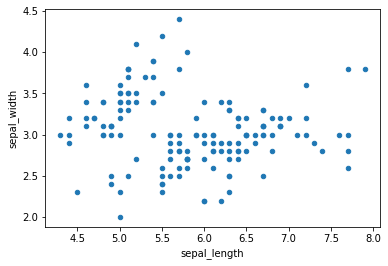

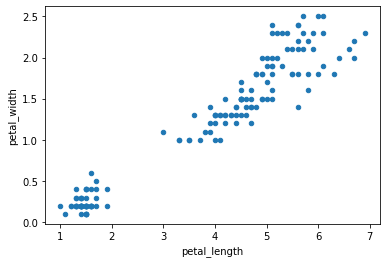

In [241]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
iris.plot.scatter(x='petal_length', y='petal_width')

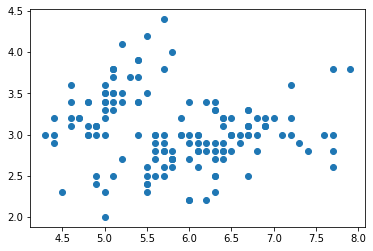

In [242]:
plt.scatter(x=iris['sepal_length'], y=iris['sepal_width'])

Text(0.5, 1.0, 'Sepal length vs width')

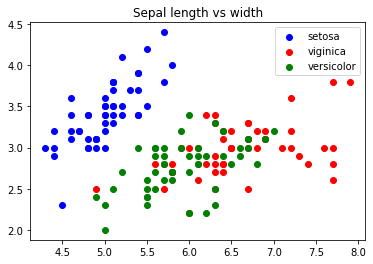

In [243]:
# But now, separate by class
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica']
versicolor = iris[iris['class'] == 'Iris-versicolor']

plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')
plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal length vs width")

In [244]:
stats.var(setosa['sepal_length'])

0.12176399999999993

In [245]:
setosa['sepal_length'].var()

0.12424897959183666

In [246]:
setosa[['sepal_length', 'sepal_width']].cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [247]:
stats.cov(setosa['sepal_length'], setosa['sepal_width'])

0.09829199999999996

In [248]:
stats.correlation(setosa['sepal_length'], setosa['sepal_width'])

0.7467803732639269

In [249]:
setosa[['sepal_length', 'sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000
